In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/samples_notebooks


In [2]:
import sys 
sys.executable

'/home/gilles/git-repos/NemesisRetroWrite/retrowrite/venv/bin/python'

In [3]:
from test_main import setup 

binary = os.path.abspath("./trees_in_trees/trees_in_trees")
outputfile = "./trees_in_trees/trees_in_trees.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


RuntimeError: Stopping nodes have not been calculate yet

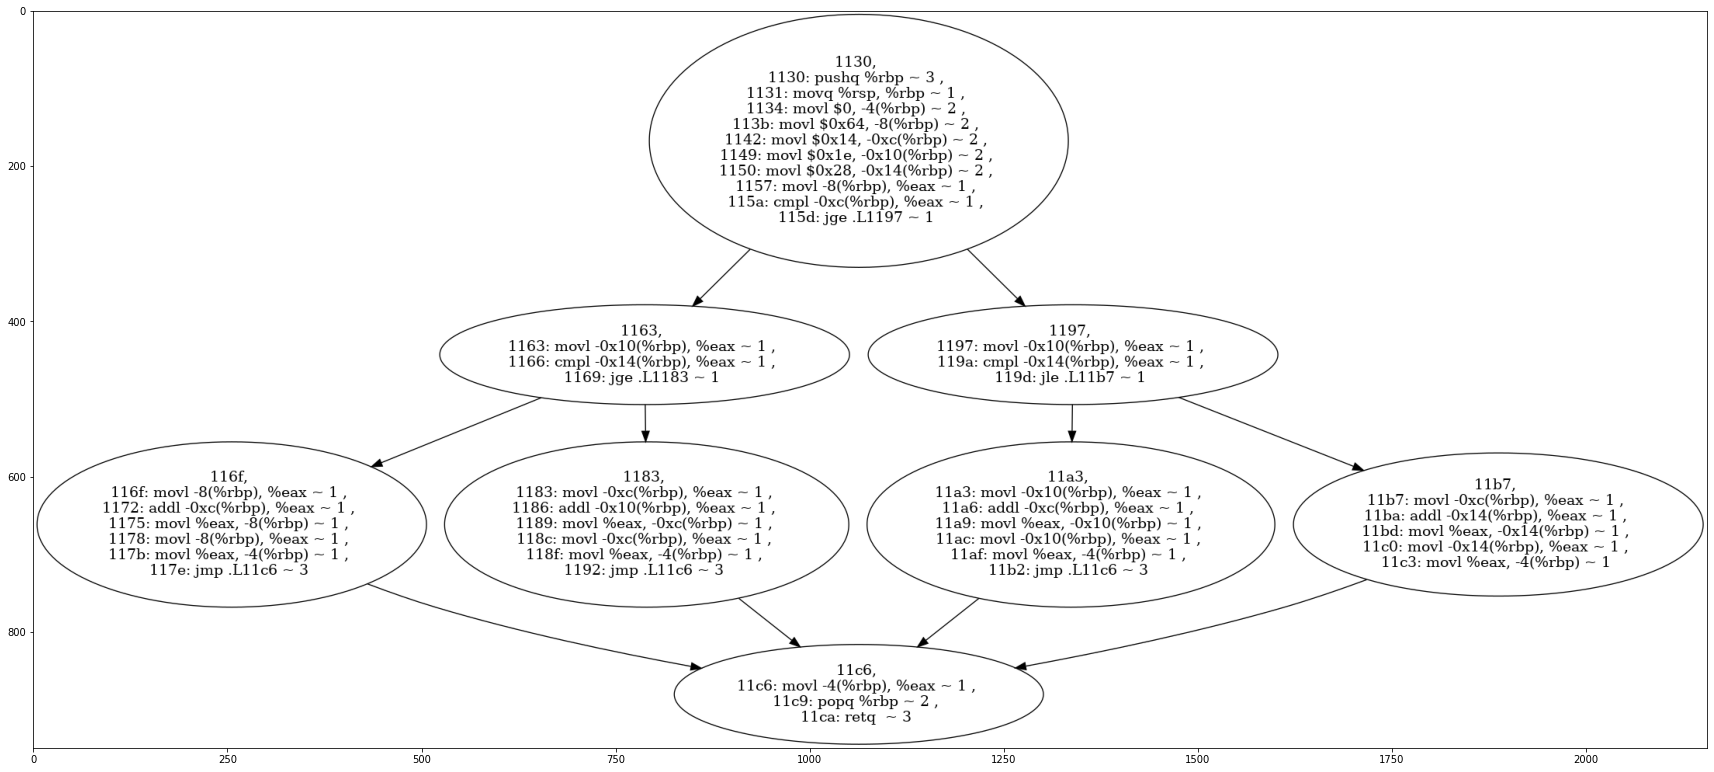

In [4]:
from rwtools.nemesis.graph.utils import create_graph_structure
from rwtools.nemesis.graph.utils import to_img
from rwtools.nemesis.graph.balance import balance_branching_point


outputfile = "./opt_code/opt_code_rw.s"
loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)
control_flow_graph.merge_consecutive_nodes()
# control_flow_graph.unwind_graph()

# control_flow_graph.insert_nodes()
axs.imshow(to_img(graph))
target_node = control_flow_graph.get_node('1197')

balance_branching_point(control_flow_graph, target_node)
axs.imshow(to_img(graph))

# control_flow_graph.merge_inserted_nodes()

# axs[2].imshow(to_img(graph))

# rw.dump()
    

In [9]:
node = control_flow_graph.get_node("1197")
control_flow_graph.get_balanced_tree_latencies(node)

[[1, 1, 1, 1, 1, 3, 3, 3, 3, 3], [1, 2, 3]]

In [6]:
from rwtools.nemesis.graph.balance import balance_latency_lists
import copy 

from rwtools.nemesis.nop_instructions import get_added_instructions

tree1_lats = control_flow_graph.get_balanced_tree_latencies(control_flow_graph.get_node("1163"))
tree2_lats = control_flow_graph.get_balanced_tree_latencies(control_flow_graph.get_node("1197"))

tree1_lats, tree2_lats
# balanced = balance_latency_lists(tree1_lats, tree2_lats)

def balance_latency_lists_v2(tree1_lats, tree2_lats):
    latencies1 = copy.deepcopy(tree1_lats)
    latencies2 = copy.deepcopy(tree2_lats)
    target_latencies = []
    for a, b in zip(latencies1, latencies2):

        if len(a) == 0:
            target_latencies.append(b)
        elif len(b) == 0: 
            target_latencies.append(a)
        else: 
            # insert nodes into the shorter list, taking into account how instructions 
            # will eventually be added 
            # e.g., you can only insert a triple of 3's (including push, pop, etc)
            i = 0 
            while True: 
                if i >= len(a) and i >= len(b): 
                    break 
                if i < len(a) and i < len(b) and a[i] == b[i]: 
                    i +=1 
                elif i >= len(a):
                    # take the end of b, add it to a 
                    a += b[i:]
                elif i >= len(b):
                    b += a[i:]
                else:
                    # variant van balance, maar er moet altijd 1 eigenschhap gelden 
                    # voor elke serie van latencies van dezelfde waarde (e.g 1,1,1 of 3,3,3,3,3) 
                    # moet het aantal latencies in die series een veelvoud zijn 
                    # van het aantal instructies die je toevoegd wanneer je balanceert
                    # bijvoorbeeld, voor latency 3, insert 5 instrutions (instr + push + pop + inc SP + dec SP)
                    # dus elke serie van 3's moet veelvoud zijn van 1 of van 5 
                    # (is er een meer algemene manier om dit uit te drukken, en te implementeren?)
                    raise NotImplementedError
            assert a==b
            target_latencies.append(a)
    return target_latencies 

balanced = balance_latency_lists_v2(tree1_lats, tree2_lats)


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


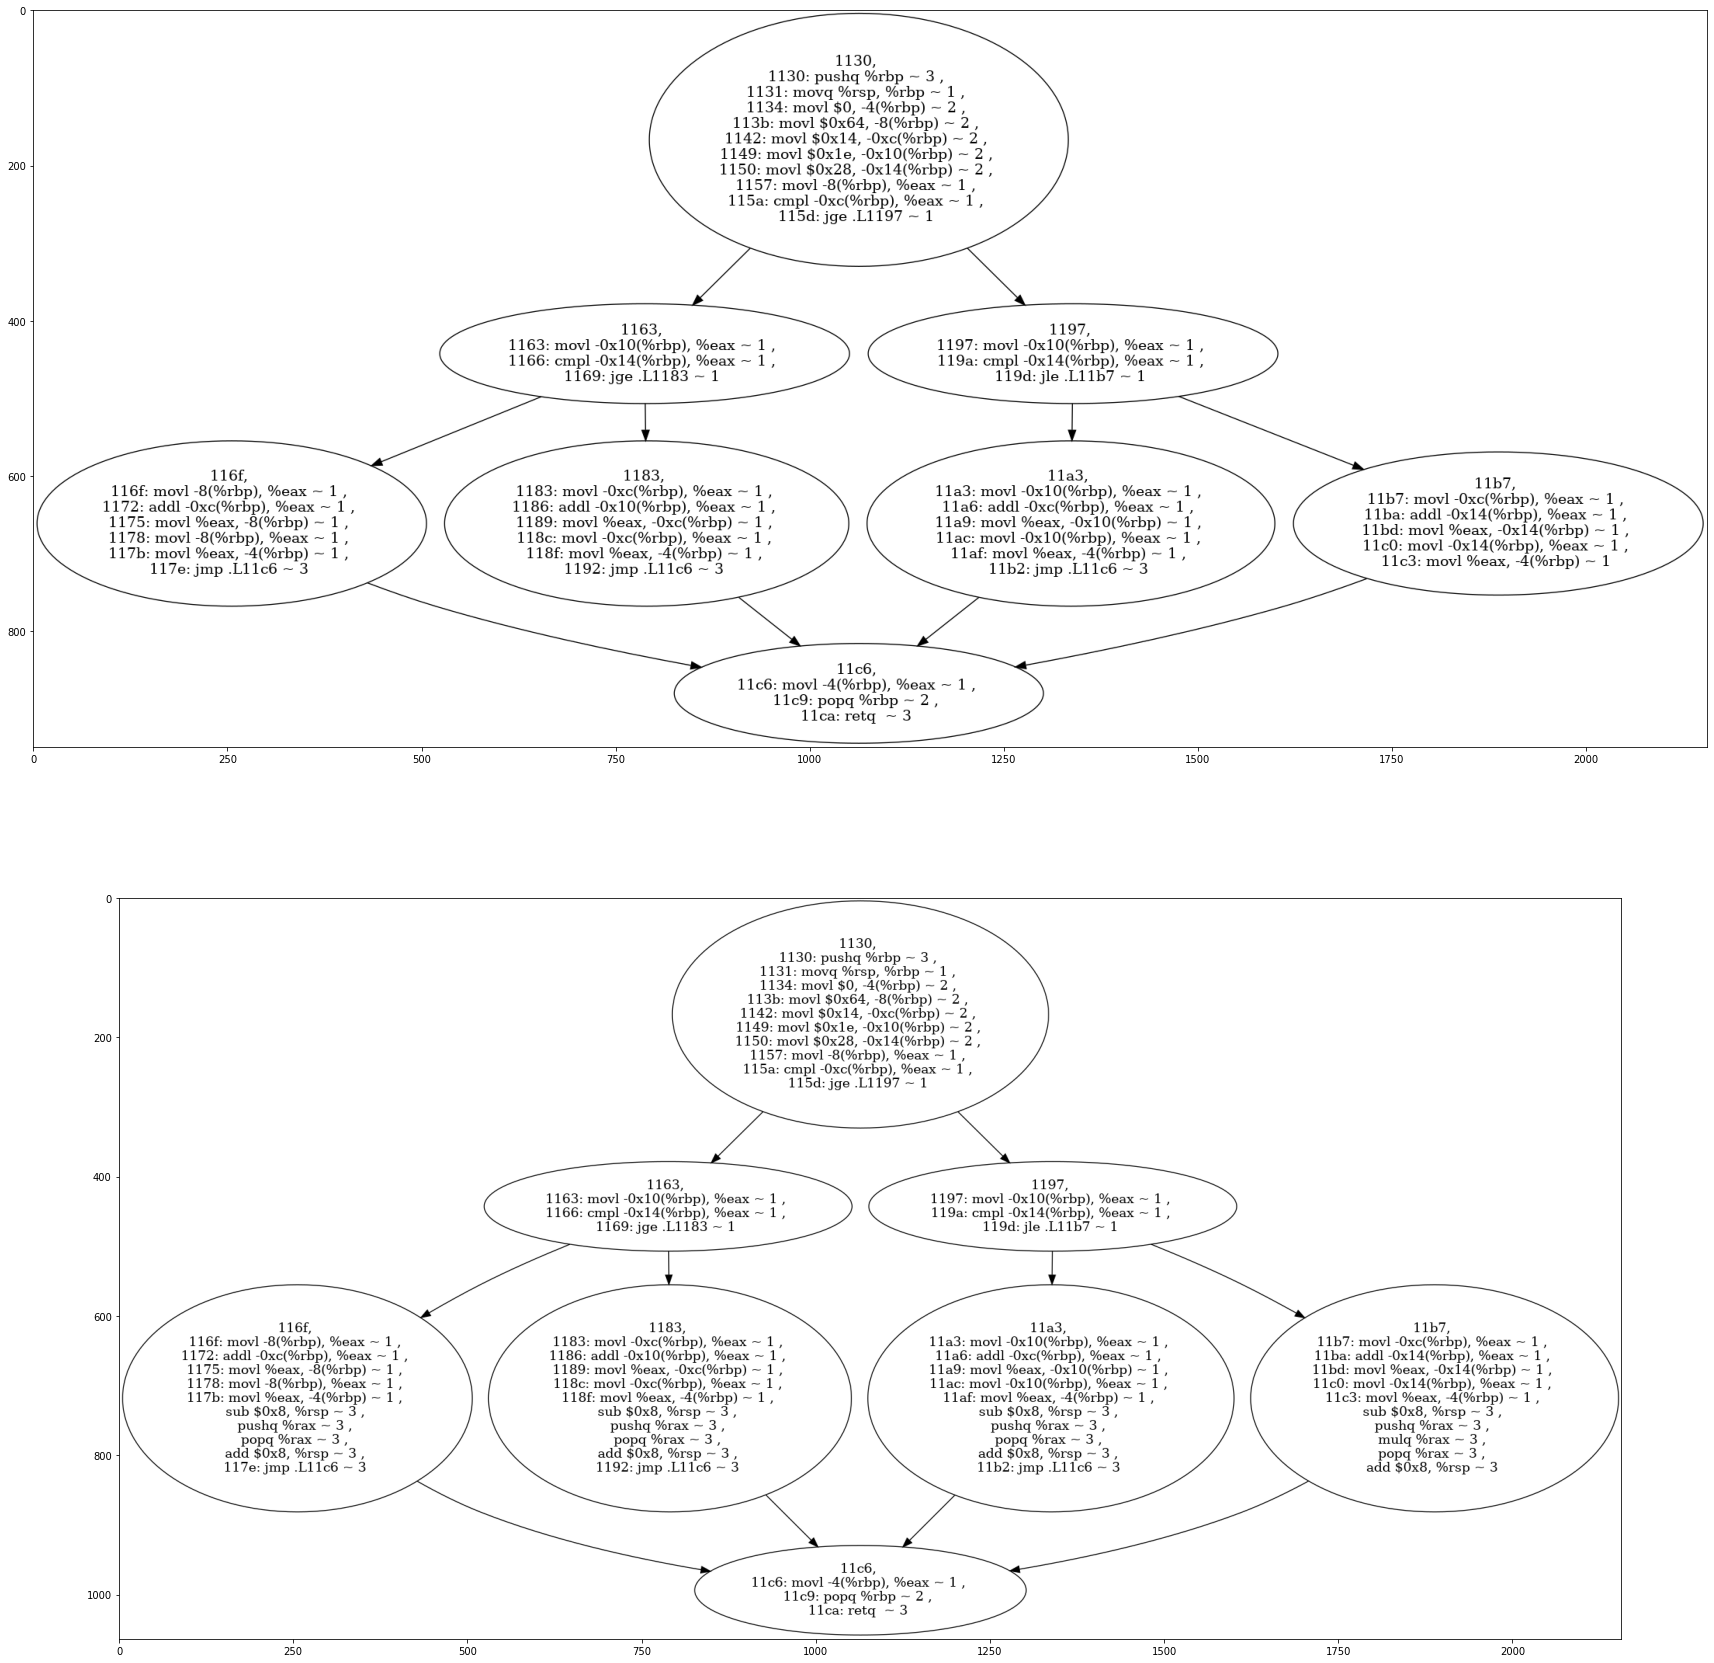

In [6]:
outputfile = "./trees_in_trees/trees_in_trees_rw.s"
loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(2, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)
control_flow_graph.merge_consecutive_nodes()
# control_flow_graph.unwind_graph()

# control_flow_graph.insert_nodes()
axs[0].imshow(to_img(graph))
target_node = control_flow_graph.get_node('1130')
control_flow_graph.set_stopping_nodes(target_node)

balance_branching_point(control_flow_graph, target_node)
axs[1].imshow(to_img(graph))

rw.dump()
